In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We want to focus on the changes from 2014 to 2015. If Boston wants to be carbon neutral in 2050, we need to track if buildings are improving and point out which aren't (and why?)

For reference, this is the description fo the columns:

* **Property Name**	Property name, as reported by owner
* **Reported**	If the building submitted a report this year. This dataset includes all reported buildings.
* **Property** Type	Property type, as identified in Portfolio Manager
* **Address**	Reported address
* **ZIP**	ZIP
* **Gross Area (sq ft)**	Gross area
* **Site EUI (kBTU/sf)**	Site energy use intensity, or EUI (in kBTU/sq. ft.): This sums up all of the energy used in the building (electricity, gas, steam, etc.) each year, and divides by square footage. There are many drivers of energy use intensity, such as energy-intensive work, and, since EUI is not adjusted for these factors, it is not a definitive indicator of building efficiency. (This metric uses site energy, not source energy.)
* **Energy Star Score**	ENERGY STAR score: Portfolio Manager calculates a 1-100 score for many types of buildings, though not all types are eligible for a score. The score uses details about the building and its location to adjust for how the building is used, and provides some measure of how it performs relative to similar buildings. A higher score means that the building uses less energy than similar buildings.
* **Energy Star Certified**	ENERGY STAR certification: Buildings with a score of 75 or higher can apply to be ENERGY STAR-certified by EPA. This field lists the years in which the building is certified.
Property Uses	List of space uses reported for this property
Year Built	Year built, as reported by the owner
* **GHG Emissions (MTCO2e)**	Greenhouse gas emissions. Portfolio Manager uses averages for the regional electric grid and other fuels to estimate annual greenhouse gas emissions. Buildings and campuses that have central plants or buy bulk power may have different emissions than estimated.
* **GHG Intensity (kgCO2/sf)**	GHG intensity (kgCO2/sf) divides total GHG emissions by square footage.
* **Total Site Energy (kBTU)** 	Total energy used in 2014 (kBTU). This is a gross sum of all annual energy use in the building, not adjusted for size or uses.
* **% Electricity**	Percent of total energy that is electricity
* **% Gas**	Percent of total energy that is gas
* **% Steam**	Percent of total energy that is steam
* **Water Intensity (gal/sf)**	Water intensity (gal/sf); the total water use divided by gross floor area.
* **Onsite Solar (kWh)**	Onsite solar generated each year (kWh)
* **User Submitted Info**	User-submitted contextual information: This is a field in which the property owner can describe ongoing efficiency work or other related information.
* **User Submitted Link**	Any link submitted by the owner
* **Tax Parcel**	Tax parcel number reported by owner


In [89]:
berdo2015 = pd.read_csv(".//data/berdo2015.csv", encoding = "ISO-8859-1")
berdo2014 = pd.read_csv(".//data/berdo2014.csv", encoding = "ISO-8859-1")

In [90]:
berdo2014.head(2)

,Property Name,Reported,Property Type,Address,ZIP,Gross Area (sq ft),Site EUI (kBTU/sf),Energy Star Score,Energy Star Certified,Property Uses,...,GHG Intensity (kgCO2/sf),Total Site Energy (kBTU),% Electricity,% Gas,% Steam,Water Intensity (gal/sf),Onsite Solar (kWh),User Submitted Info,User Submitted Link,Tax Parcel
0,MEEI -Longwood,Yes,Ambulatory Surgical Center,800 Huntington Ave,02115,"76,300",173.1,Not applicable to this property type,NaN,Ambulatory Surgical Center,...,12.7,"13,204,950",47%,53%,0%,NaN,NaN,NaN,NaN,1000894000
1,Prime Motor Group,Yes,Automobile Dealership,1525-1607 VFW Parkway,02132,"150,000",28.7,Not applicable to this property type,NaN,"Automobile Dealership, Parking",...,2.8,"4,301,102",100%,0%,0%,8.96,NaN,NaN,NaN,2010643010


In [91]:
berdo2015.head(2)

,Property Name,Reported,Property Type,Address,ZIP,Gross Area (sq ft),Site EUI (kBTU/sf),Energy Star Score,Energy Star Certified,Property Uses,...,Total Site Energy (kBTU),% Electricity,% Gas,% Steam,Water Intensity (gal/sf),Onsite Solar (kWh),User Submitted Info,User Submitted Link,Tax Parcel,Years Reported
0,#2679 South Bay/Boston,Yes,Retail Store,5 Alllstate Road,02125,"132,000",70.7,74,NaN,"Parking, Retail Store",...,"9,331,692",56%,44%,NaN,7.6,NaN,NaN,NaN,0703501080,"2014, 2015, 2016"
1,0004 Roslindale,Yes,Supermarket/Grocery Store,950 American Legion Hgwy,02131,"38,694",245.9,49,NaN,Supermarket/Grocery,...,"9,515,343",61%,39%,NaN,62.1,NaN,NaN,NaN,1807323000,"2015, 2016"


Let's check sizes:

In [95]:
print(berdo2015.shape)
print(berdo2014.shape)

(1502, 23)
(1380, 22)


What is the difference in columns?

In [96]:
set(berdo2015.columns.tolist()) - set(berdo2014.columns.tolist())

{'Years Reported'}

There is no property id, so let's see if we can match up by 

* Property name
* Address

Let's see how many elements we have in common for those 2 features:

In [97]:
p15 = berdo2015["Property Name"].tolist()
p14 = berdo2014["Property Name"].tolist()
len(list(set(p15).intersection(p14)))

1094

In [98]:
a15 = berdo2015["Address"].tolist()
a14 = berdo2014["Address"].tolist()
len(list(set(a15).intersection(a14)))

1161

Let's do the join. We convert to lower case first

In [ ]:
berdo2015["Address"] = berdo2015["Address"].astype(str)
berdo2014["Address"] = berdo2014["Address"].astype(str)
berdo2015["Address"] = berdo2015["Address"].map(str.lower)
berdo2014["Address"] = berdo2014["Address"].map(str.lower)
berdo2015["Property Name"] = berdo2015["Property Name"].astype(str)
berdo2014["Property Name"] = berdo2014["Property Name"].astype(str)
berdo2015["Property Name"] = berdo2015["Property Name"].map(str.lower)
berdo2014["Property Name"] = berdo2014["Property Name"].map(str.lower)

In [94]:
berdo = pd.merge(berdo2015, berdo2014,
                 how='inner',
                 on=['Address','Property Name'],
                 suffixes=('_2015', '_2014'))
berdo.shape

(1085, 43)

In [ ]:
berdo.head(2)

In [2]:
#berdo.to_csv(".\\data\\berdo.csv", index=False)
berdo = pd.read_csv(".\\data\\berdo.csv")

### CLEAN COLUMNS

Now let's proceed to examine and clean columns 1 by 1

In [3]:
berdo.columns.tolist()

['Property Name',
 'Reported_2015',
 'Property Type_2015',
 'Address',
 'ZIP_2015',
 'Gross Area (sq ft)_2015',
 'Site EUI (kBTU/sf)_2015',
 'Energy Star Score_2015',
 'Energy Star Certified_2015',
 'Property Uses_2015',
 'Year Built_2015',
 'GHG Emissions (MTCO2e)_2015',
 'GHG Intensity (kgCO2/sf)_2015',
 ' Total Site Energy (kBTU) _2015',
 '% Electricity_2015',
 '% Gas_2015',
 '% Steam_2015',
 'Water Intensity (gal/sf)_2015',
 'Onsite Solar (kWh)_2015',
 'User Submitted Info_2015',
 'User Submitted Link_2015',
 'Tax Parcel_2015',
 'Years Reported',
 'Reported_2014',
 'Property Type_2014',
 'ZIP_2014',
 'Gross Area (sq ft)_2014',
 'Site EUI (kBTU/sf)_2014',
 'Energy Star Score_2014',
 'Energy Star Certified_2014',
 'Property Uses_2014',
 'Year Built_2014',
 'GHG Emissions (MTCO2e)_2014',
 'GHG Intensity (kgCO2/sf)_2014',
 ' Total Site Energy (kBTU) _2014',
 '% Electricity_2014',
 '% Gas_2014',
 '% Steam_2014',
 'Water Intensity (gal/sf)_2014',
 'Onsite Solar (kWh)_2014',
 'User Submit

In [34]:
# missing values
berdo.isnull().sum()[berdo.isnull().sum() != 0]

Energy Star Certified_2015       1019
Property Uses_2015                  7
% Electricity_2015                 46
% Gas_2015                        215
% Steam_2015                      986
Water Intensity (gal/sf)_2015     336
Onsite Solar (kWh)_2015          1081
User Submitted Info_2015          893
User Submitted Link_2015         1086
Energy Star Certified_2014       1028
Water Intensity (gal/sf)_2014     156
Onsite Solar (kWh)_2014          1081
User Submitted Info_2014          943
User Submitted Link_2014         1063
Tax Parcel_2014                   296
dtype: int64

Let's take a look at each column to fix it if needed

### Gross Area (sq ft)

In [35]:
berdo["Gross Area (sq ft)_2015"].replace(" Not Available ", "-1", inplace=True)
berdo["Gross Area (sq ft)_2015"] = berdo["Gross Area (sq ft)_2015"].map(lambda x: float(x.strip().replace(",",""))) 
berdo["Gross Area (sq ft)_2014"].replace(" Not Available ", "-1", inplace=True)
berdo["Gross Area (sq ft)_2014"].replace(" -   ", "-1", inplace=True)
berdo["Gross Area (sq ft)_2014"] = berdo["Gross Area (sq ft)_2014"].map(lambda x: float(x.strip().replace(",","")))

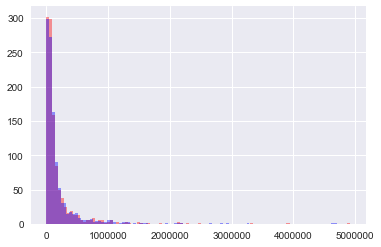

In [36]:
berdo["Gross Area (sq ft)_2015"].hist(bins=100,alpha=0.4, color='red' )
berdo["Gross Area (sq ft)_2014"].hist(bins=100,alpha=0.4,color='blue' )
plt.show()

### Site EUI (kBTU/sf)

In [37]:
#berdo["Site EUI (kBTU/sf)_2014"].value_counts()
berdo["Site EUI (kBTU/sf)_2015"] = berdo["Site EUI (kBTU/sf)_2015"].map(str.strip) 
berdo["Site EUI (kBTU/sf)_2015"].replace("Not Available", "-1", inplace=True)
berdo["Site EUI (kBTU/sf)_2015"] = berdo["Site EUI (kBTU/sf)_2015"].map(lambda x: float(x.strip().replace(",","")))
berdo["Site EUI (kBTU/sf)_2014"] = berdo["Site EUI (kBTU/sf)_2014"].map(str.strip) 
berdo["Site EUI (kBTU/sf)_2014"].replace("Not Available", "-1", inplace=True)
berdo["Site EUI (kBTU/sf)_2014"] = berdo["Site EUI (kBTU/sf)_2014"].map(lambda x: float(x.strip().replace(",","")))

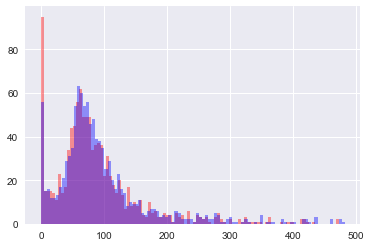

In [59]:
berdo[berdo["Site EUI (kBTU/sf)_2014"]<500]["Site EUI (kBTU/sf)_2014"].hist(bins=100,alpha=0.4, color='red')
berdo[berdo["Site EUI (kBTU/sf)_2015"]<500]["Site EUI (kBTU/sf)_2015"].hist(bins=100,alpha=0.4, color='blue')
plt.show()

In [47]:
# there might be some errors here, we need to look a these entries more closely
berdo[berdo["Site EUI (kBTU/sf)_2014"]>500][["Site EUI (kBTU/sf)_2015","Site EUI (kBTU/sf)_2014"]]

,Site EUI (kBTU/sf)_2015,Site EUI (kBTU/sf)_2014
197,166.6,73235.1
201,68.8,3465.0
302,-1.0,2362.9
489,491452.2,545556.8
491,671.2,603.6
493,604.0,619.6
756,535.6,568.8
766,83.6,2361.4
780,358.1,585.4
874,-1.0,60354.8


### GHG Emissions (MTCO2e)

In [62]:
#berdo["Site EUI (kBTU/sf)_2014"].value_counts()
berdo["GHG Emissions (MTCO2e)_2015"] = berdo["GHG Emissions (MTCO2e)_2015"].map(str.strip) 
berdo["GHG Emissions (MTCO2e)_2015"].replace("Not Available", "-1", inplace=True)
berdo["GHG Emissions (MTCO2e)_2015"] = berdo["GHG Emissions (MTCO2e)_2015"].map(lambda x: float(x.strip().replace(",","")))
berdo["GHG Emissions (MTCO2e)_2014"] = berdo["GHG Emissions (MTCO2e)_2014"].map(str.strip) 
berdo["GHG Emissions (MTCO2e)_2014"].replace("Not Available", "-1", inplace=True)
berdo["GHG Emissions (MTCO2e)_2014"] = berdo["GHG Emissions (MTCO2e)_2014"].map(lambda x: float(x.strip().replace(",","")))

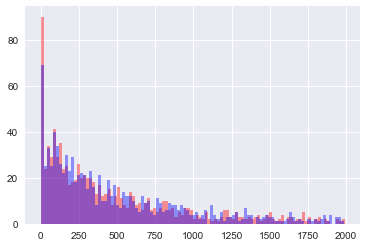

In [64]:
berdo[berdo["GHG Emissions (MTCO2e)_2014"]<2000]["GHG Emissions (MTCO2e)_2014"].hist(bins=100,alpha=0.4, color='red')
berdo[berdo["GHG Emissions (MTCO2e)_2015"]<2000]["GHG Emissions (MTCO2e)_2015"].hist(bins=100,alpha=0.4, color='blue')
plt.show()

In [68]:
# some may be wrong
berdo[berdo["GHG Emissions (MTCO2e)_2015"]>14000][["GHG Emissions (MTCO2e)_2015","GHG Emissions (MTCO2e)_2014"]]

,GHG Emissions (MTCO2e)_2015,GHG Emissions (MTCO2e)_2014
106,262372.0,3141.7
340,56617.9,56693.7
348,24362.3,24575.9
352,73790.8,73718.0
353,22472.0,23247.4
358,42969.3,36992.5
489,237658.1,263803.6
806,50014.4,48581.7
859,48754.8,47893.7
862,28730.6,77894.7


### Total Site Energy (kBTU)

In [72]:
berdo[" Total Site Energy (kBTU) _2015"] = berdo[" Total Site Energy (kBTU) _2015"].map(str.strip) 
berdo[" Total Site Energy (kBTU) _2015"].replace("Not Available", "-1", inplace=True)
berdo[" Total Site Energy (kBTU) _2015"] = berdo[" Total Site Energy (kBTU) _2015"].map(lambda x: float(x.strip().replace(",","")))
berdo[" Total Site Energy (kBTU) _2014"] = berdo[" Total Site Energy (kBTU) _2014"].map(str.strip) 
berdo[" Total Site Energy (kBTU) _2014"].replace("Not Available", "-1", inplace=True)
berdo[" Total Site Energy (kBTU) _2014"] = berdo[" Total Site Energy (kBTU) _2014"].map(lambda x: float(x.strip().replace(",","")))

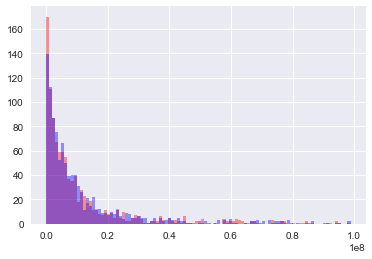

In [78]:
berdo[berdo[" Total Site Energy (kBTU) _2014"]<100000000][" Total Site Energy (kBTU) _2014"].hist(bins=100,alpha=0.4, color='red')
berdo[berdo[" Total Site Energy (kBTU) _2015"]<100000000][" Total Site Energy (kBTU) _2015"].hist(bins=100,alpha=0.4, color='blue')
plt.show()

### % Gas	% Steam	% Electricity

In [103]:
# we set Nan to 0% then convert to float
berdo["% Gas_2015"].fillna("0%", inplace=True)
berdo["% Steam_2015"].fillna("0%", inplace=True)
berdo["% Electricity_2015"].fillna("0%", inplace=True)

berdo["% Gas_2015"] = berdo["% Gas_2015"].map(lambda x: float(x.strip().replace("%","")))
berdo["% Steam_2015"] = berdo["% Steam_2015"].map(lambda x: float(x.strip().replace("%","")))
berdo["% Electricity_2015"] = berdo["% Electricity_2015"].map(lambda x: float(x.strip().replace("%","")))
berdo["% Gas_2014"] = berdo["% Gas_2014"].map(lambda x: float(x.strip().replace("%","")))
berdo["% Steam_2014"] = berdo["% Steam_2014"].map(lambda x: float(x.strip().replace("%","")))
berdo["% Electricity_2014"] = berdo["% Electricity_2014"].map(lambda x: float(x.strip().replace("%","")))

In [113]:
berdo[["% Gas_2015","% Steam_2015","% Electricity_2015"]].sum(axis=1).value_counts()

100.0    976
0.0       39
99.0      14
101.0      4
69.0       3
22.0       3
70.0       3
73.0       2
51.0       2
56.0       2
68.0       2
71.0       2
41.0       2
82.0       2
12.0       2
86.0       2
33.0       1
14.0       1
19.0       1
20.0       1
11.0       1
7.0        1
27.0       1
5.0        1
29.0       1
32.0       1
97.0       1
54.0       1
38.0       1
46.0       1
50.0       1
94.0       1
98.0       1
61.0       1
64.0       1
67.0       1
84.0       1
87.0       1
92.0       1
93.0       1
59.0       1
dtype: int64

In [114]:
berdo[["% Gas_2014","% Steam_2014","% Electricity_2014"]].sum(axis=1).value_counts()

100.0    947
0.0       69
99.0       7
38.0       3
67.0       3
71.0       3
35.0       2
57.0       2
60.0       2
32.0       2
72.0       2
74.0       2
76.0       2
12.0       2
5.0        2
26.0       1
24.0       1
28.0       1
23.0       1
31.0       1
18.0       1
17.0       1
13.0       1
33.0       1
11.0       1
10.0       1
7.0        1
34.0       1
37.0       1
101.0      1
42.0       1
44.0       1
98.0       1
97.0       1
93.0       1
92.0       1
90.0       1
89.0       1
88.0       1
82.0       1
79.0       1
78.0       1
77.0       1
75.0       1
73.0       1
69.0       1
66.0       1
48.0       1
45.0       1
56.0       1
dtype: int64

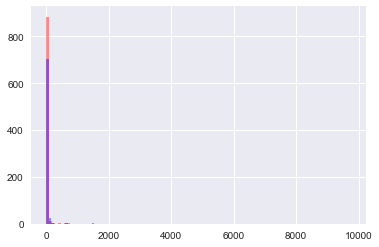

In [121]:
berdo["Water Intensity (gal/sf)_2014"].replace("Not Available", "-1", inplace=True)
berdo["Water Intensity (gal/sf)_2015"].replace("Not Available", "-1", inplace=True)
berdo["Water Intensity (gal/sf)_2014"] = berdo["Water Intensity (gal/sf)_2014"].astype(float)
berdo["Water Intensity (gal/sf)_2015"] = berdo["Water Intensity (gal/sf)_2015"].astype(float)

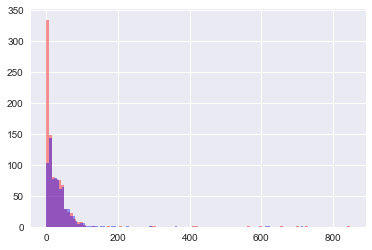

In [122]:
berdo[berdo["Water Intensity (gal/sf)_2014"]<1000]["Water Intensity (gal/sf)_2014"].hist(bins=100,alpha=0.4, color='red')
berdo[berdo["Water Intensity (gal/sf)_2015"]<1000]["Water Intensity (gal/sf)_2015"].hist(bins=100,alpha=0.4, color='blue')
plt.show()

### Onsite Solar (kWh)

In [125]:
berdo["Onsite Solar (kWh)_2015"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1055   NaN
1056   NaN
1057   NaN
1058   NaN
1059   NaN
1060   NaN
1061   NaN
1062   NaN
1063   NaN
1064   NaN
1065   NaN
1066   NaN
1067   NaN
1068   NaN
1069   NaN
1070   NaN
1071   NaN
1072   NaN
1073   NaN
1074   NaN
1075   NaN
1076   NaN
1077   NaN
1078   NaN
1079   NaN
1080   NaN
1081   NaN
1082   NaN
1083   NaN
1084   NaN
Name: Onsite Solar (kWh)_2015, dtype: float64

In [ ]:
 '% Electricity_2015',
 '% Gas_2015',
 '% Steam_2015'

In [33]:
berdo = pd.read_csv(".\\data\\berdo.csv")

print(berdo.columns)

cols = ['Gross Area (sq ft)', 'Site EUI (kBTU/sf)',
        'GHG Emissions (MTCO2e)', 'GHG Intensity (kgCO2/sf)',
        ' Total Site Energy (kBTU) ','Water Intensity (gal/sf)']

def to_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return -1

def fix_numerical (columns):
    
    for c in columns:
        
        for year in ("_2014","_2015"):
            cyear = c + year
            berdo[cyear] = berdo[cyear].map(lambda x: str(x).strip().replace(",",""))
            berdo[cyear] = berdo[cyear].map(to_number)
            cyear = c
            

fix_numerical(cols)

Index(['Property Name', 'Reported_2015', 'Property Type_2015', 'Address',
       'ZIP_2015', 'Gross Area (sq ft)_2015', 'Site EUI (kBTU/sf)_2015',
       'Energy Star Score_2015', 'Energy Star Certified_2015',
       'Property Uses_2015', 'Year Built_2015', 'GHG Emissions (MTCO2e)_2015',
       'GHG Intensity (kgCO2/sf)_2015', ' Total Site Energy (kBTU) _2015',
       '% Electricity_2015', '% Gas_2015', '% Steam_2015',
       'Water Intensity (gal/sf)_2015', 'Onsite Solar (kWh)_2015',
       'User Submitted Info_2015', 'User Submitted Link_2015',
       'Tax Parcel_2015', 'Years Reported', 'Reported_2014',
       'Property Type_2014', 'ZIP_2014', 'Gross Area (sq ft)_2014',
       'Site EUI (kBTU/sf)_2014', 'Energy Star Score_2014',
       'Energy Star Certified_2014', 'Property Uses_2014', 'Year Built_2014',
       'GHG Emissions (MTCO2e)_2014', 'GHG Intensity (kgCO2/sf)_2014',
       ' Total Site Energy (kBTU) _2014', '% Electricity_2014', '% Gas_2014',
       '% Steam_2014', 'Water I

In [26]:
berdo = pd.read_csv(".\\data\\berdo.csv")
berdo[['Gross Area (sq ft)_2015', 'Site EUI (kBTU/sf)_2015',
        'GHG Emissions (MTCO2e)_2015', 'GHG Intensity (kgCO2/sf)_2015',
        ' Total Site Energy (kBTU) _2015','Water Intensity (gal/sf)_2015','Gross Area (sq ft)_2014', 'Site EUI (kBTU/sf)_2014',
        'GHG Emissions (MTCO2e)_2014', 'GHG Intensity (kgCO2/sf)_2014',
        ' Total Site Energy (kBTU) _2014','Water Intensity (gal/sf)_2014']]

,Gross Area (sq ft)_2015,Site EUI (kBTU/sf)_2015,GHG Emissions (MTCO2e)_2015,GHG Intensity (kgCO2/sf)_2015,Total Site Energy (kBTU) _2015,Water Intensity (gal/sf)_2015,Gross Area (sq ft)_2014,Site EUI (kBTU/sf)_2014,GHG Emissions (MTCO2e)_2014,GHG Intensity (kgCO2/sf)_2014,Total Site Energy (kBTU) _2014,Water Intensity (gal/sf)_2014
0,"132,000",70.7,724.4,5.5,"9,331,692",7.6,"132,000",63.8,676.9,5.1,"8,418,749",4.88
1,"38,694",245.9,760.2,19.6,"9,515,343",62.1,"38,694",248.7,779.6,20.1,"9,622,656.0",0.0
2,"61,548",194.8,952.2,15.5,"11,987,839",103.3,"61,548",197.1,984.1,16,"12,133,975.1",0.0
3,"30,982",186.5,457.1,14.8,"5,776,977",108.5,"30,982",191.4,459.7,14.8,"5,929,914.9",0.0
4,"79,894",220.1,1364.7,17.1,"17,581,736",180.2,"79,894",236,1465.6,18.3,"18,856,842.8",0.0
5,"1,078,903",87.9,12935.3,12.0,"94,854,311",12.2,"1,190,380",88.1,12820.8,11.9,"95,020,563",14.54
6,"40,005",246.8,785.1,19.6,"9,873,792",156.5,"40,005",234.6,751,18.8,"9,386,359.9",0.0
7,"38,890",146.8,525.2,13.5,"5,707,514",142.3,"38,890",226,680.8,17.5,"8,789,217.8",19.6
8,"79,401",188.5,1181.3,14.9,"14,965,253",23.7,"79,401",203,1304.5,16.4,"16,114,429.6",0.0
9,"58,051",156.1,732.3,12.6,"9,059,810",131.5,"58,051",150.7,704.6,12.1,"8,746,315",176.34


In [34]:
berdo[['Gross Area (sq ft)_2015', 'Site EUI (kBTU/sf)_2015',
        'GHG Emissions (MTCO2e)_2015', 'GHG Intensity (kgCO2/sf)_2015',
        ' Total Site Energy (kBTU) _2015','Water Intensity (gal/sf)_2015','Gross Area (sq ft)_2014', 'Site EUI (kBTU/sf)_2014',
        'GHG Emissions (MTCO2e)_2014', 'GHG Intensity (kgCO2/sf)_2014',
        ' Total Site Energy (kBTU) _2014','Water Intensity (gal/sf)_2014']]

,Gross Area (sq ft)_2015,Site EUI (kBTU/sf)_2015,GHG Emissions (MTCO2e)_2015,GHG Intensity (kgCO2/sf)_2015,Total Site Energy (kBTU) _2015,Water Intensity (gal/sf)_2015,Gross Area (sq ft)_2014,Site EUI (kBTU/sf)_2014,GHG Emissions (MTCO2e)_2014,GHG Intensity (kgCO2/sf)_2014,Total Site Energy (kBTU) _2014,Water Intensity (gal/sf)_2014
0,132000.0,70.7,724.4,5.5,9331692.0,7.6,132000.0,63.8,676.9,5.1,8.418749e+06,4.88
1,38694.0,245.9,760.2,19.6,9515343.0,62.1,38694.0,248.7,779.6,20.1,9.622656e+06,0.00
2,61548.0,194.8,952.2,15.5,11987839.0,103.3,61548.0,197.1,984.1,16.0,1.213398e+07,0.00
3,30982.0,186.5,457.1,14.8,5776977.0,108.5,30982.0,191.4,459.7,14.8,5.929915e+06,0.00
4,79894.0,220.1,1364.7,17.1,17581736.0,180.2,79894.0,236.0,1465.6,18.3,1.885684e+07,0.00
5,1078903.0,87.9,12935.3,12.0,94854311.0,12.2,1190380.0,88.1,12820.8,11.9,9.502056e+07,14.54
6,40005.0,246.8,785.1,19.6,9873792.0,156.5,40005.0,234.6,751.0,18.8,9.386360e+06,0.00
7,38890.0,146.8,525.2,13.5,5707514.0,142.3,38890.0,226.0,680.8,17.5,8.789218e+06,19.60
8,79401.0,188.5,1181.3,14.9,14965253.0,23.7,79401.0,203.0,1304.5,16.4,1.611443e+07,0.00
9,58051.0,156.1,732.3,12.6,9059810.0,131.5,58051.0,150.7,704.6,12.1,8.746315e+06,176.34


In [16]:
berdo = pd.read_csv(".\\data\\berdo.csv")

print(berdo["GHG Intensity (kgCO2/sf)_2015"].value_counts())

berdo["GHG Intensity (kgCO2/sf)_2015"] = berdo["GHG Intensity (kgCO2/sf)_2015"].map(str.strip) 
berdo["GHG Intensity (kgCO2/sf)_2015"].replace("Not Available", "-1", inplace=True)
berdo["GHG Intensity (kgCO2/sf)_2015"] = berdo["GHG Intensity (kgCO2/sf)_2015"].map(lambda x: float(x.strip().replace(",","")))


Not Available    24
5.5              22
5.8              22
5.3              22
3.5              20
5.9              18
5.4              18
5.7              17
3.2              16
6.2              16
5.6              15
3.3              15
3.4              15
4.3              15
3.8              15
4.2              15
4.9              15
5.1              15
2.9              15
4.6              14
6.3              14
3.7              14
7.3              14
3.6              14
6.8              13
4.4              13
0.0              13
6.6              12
5.0              12
3.9              12
                 ..
32.0              1
18.2              1
15.2              1
16.0              1
1712.0            1
29.2              1
30.0              1
23.8              1
26.0              1
2                 1
46.1              1
26.1              1
11.4              1
118.2             1
21.2              1
1351.1            1
32649.8           1
40.5              1
16.6              1


ValueError: could not convert string to float: '#VALUE!'

Should I keep only >98% for energy? check how many or why

Should I keep only entries when difference is not huge???? what is consider a huge difference?

Should I remove MA (-1) on emisisons and energy metrics??? this is the main focus

How does the data set looks like if I remove? Create function to test different options.

solar is set to 0 and we keep all

Create funtion to plot.

* Site EUI (kBTU/sf): What type of buildings have more? and less? Remeber this doesn't say much because it depends of what kind of building (property) it is.
    * % Electricity Percent of total energy that is electricity
    * % Gas Percent of total energy that is gas
    * % Steam Percent of total energy that is steam

* GHG Emissions (MTCO2e) what buildings total
* GHG Intensity (kgCO2/sf) per sqfoot
* Energy Star Score